In [1]:
pip install imblearn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import imblearn as sns
print("Seaborn imported successfully!")


Seaborn imported successfully!


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

from imblearn.over_sampling import RandomOverSampler

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, callbacks
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

In [4]:
df = pd.read_csv('asthma_disease_data.csv')
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [5]:
# Dropping irrelevant columns
df = df.drop(['PatientID', 'DoctorInCharge'], axis = 1)

In [6]:
df.info()
df[df.duplicated()].shape[0]
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     2392 non-null   int64  
 1   Gender                  2392 non-null   int64  
 2   Ethnicity               2392 non-null   int64  
 3   EducationLevel          2392 non-null   int64  
 4   BMI                     2392 non-null   float64
 5   Smoking                 2392 non-null   int64  
 6   PhysicalActivity        2392 non-null   float64
 7   DietQuality             2392 non-null   float64
 8   SleepQuality            2392 non-null   float64
 9   PollutionExposure       2392 non-null   float64
 10  PollenExposure          2392 non-null   float64
 11  DustExposure            2392 non-null   float64
 12  PetAllergy              2392 non-null   int64  
 13  FamilyHistoryAsthma     2392 non-null   int64  
 14  HistoryOfAllergies      2392 non-null   

,count,mean,std,min,25%,50%,75%,max
Age,2392.0,42.137960,21.606655,5.000000,23.000000,42.000000,61.000000,79.000000
Gender,2392.0,0.493311,0.500060,0.000000,0.000000,0.000000,1.000000,1.000000
Ethnicity,2392.0,0.669732,0.986120,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2392.0,1.307274,0.898242,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2392.0,27.244877,7.201628,15.031803,20.968313,27.052202,33.555903,39.985611
Smoking,2392.0,0.141722,0.348838,0.000000,0.000000,0.000000,0.000000,1.000000
PhysicalActivity,2392.0,5.051786,2.903574,0.001740,2.578333,5.016881,7.540234,9.995809
DietQuality,2392.0,5.022867,2.909980,0.003031,2.432043,5.115383,7.544216,9.999904
SleepQuality,2392.0,7.019012,1.732475,4.001437,5.498500,6.975839,8.526950,9.996235
PollutionExposure,2392.0,5.013030,2.935605,0.001022,2.432559,5.036519,7.630037,9.998964


In [7]:
df_copy = df.copy()
df_copy['Gender'] = np.where(df_copy['Gender'] == 1, 'female', 'male')
df_copy['Diagnosis'] = np.where(df_copy['Diagnosis'] == 1, 'Yes', 'No')
df_copy['Smoking'] = np.where(df_copy['Smoking'] == 1, 'Yes', 'No')

<Axes: xlabel='Diagnosis', ylabel='count'>

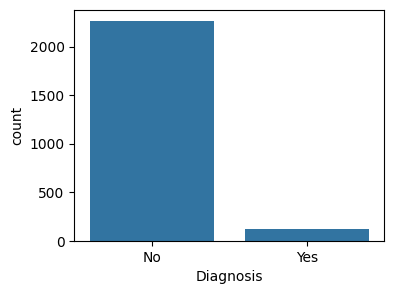

In [8]:
# How many asthmatics vs. non-asthmatics exist in data.
fig, ax = plt.subplots(figsize=(4, 3))
sns.countplot(x = 'Diagnosis', data = df_copy)

In [9]:
df_copy.groupby('Diagnosis').Diagnosis.count()

Diagnosis
No     2268
Yes     124
Name: Diagnosis, dtype: int64

<Axes: xlabel='Diagnosis', ylabel='count'>

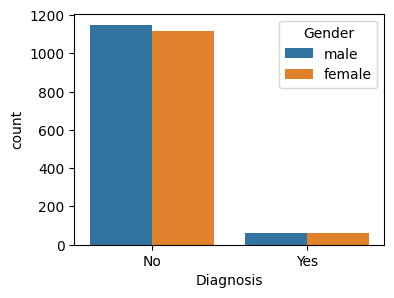

In [10]:
# Asthma rates between the Male and Female.
fig, ax = plt.subplots(figsize=(4, 3))
sns.countplot(x = 'Diagnosis', hue = 'Gender', data = df_copy)

<Axes: xlabel='Diagnosis', ylabel='count'>

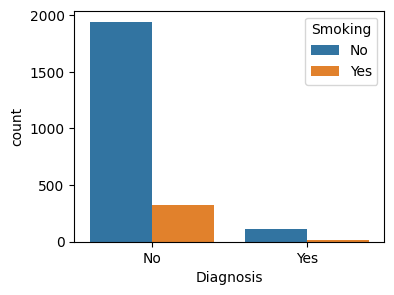

In [11]:
# Asthma rates between the smoking vs. non-smoking.
fig, ax = plt.subplots(figsize=(4, 3))
sns.countplot(x = 'Diagnosis', hue = 'Smoking', data = df_copy)

(array([16., 13., 15.,  7., 16., 11.,  8., 12., 12., 14.]),
 array([ 5. , 12.4, 19.8, 27.2, 34.6, 42. , 49.4, 56.8, 64.2, 71.6, 79. ]),
 <BarContainer object of 10 artists>)

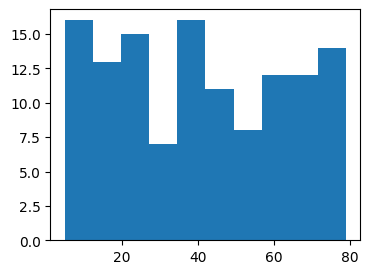

In [12]:
# Distribution of asthmatics age.
fig, ax = plt.subplots(figsize=(4, 3))
plt.hist(df_copy[df_copy['Diagnosis'] == 'Yes']['Age'])

In [13]:
X = df.drop(['Diagnosis'], axis = 1)
y = df['Diagnosis']

OverS = RandomOverSampler(random_state = 24)
X, y = OverS.fit_resample(X, y)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [14]:
early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001, # (0.001)minimium amount of change to count as an improvement
    patience = 10,     #(20) how many epochs to wait before stopping
    restore_best_weights = True,
)

model = keras.Sequential([
    layers.Dense(512, activation = 'relu', input_shape = [X_train.shape[1]]),
    layers.Dense(1, activation = 'sigmoid')
])

model.compile(
    optimizer = RMSprop(learning_rate = 0.001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']    
)

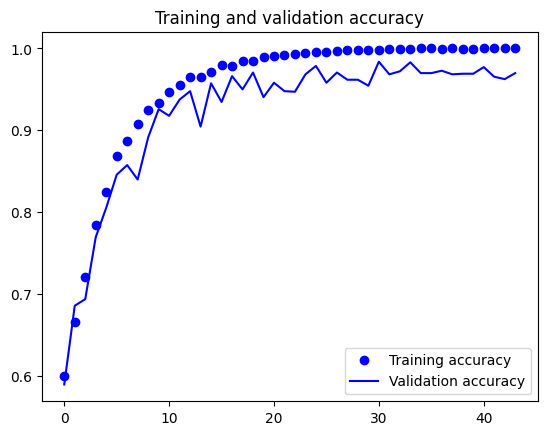

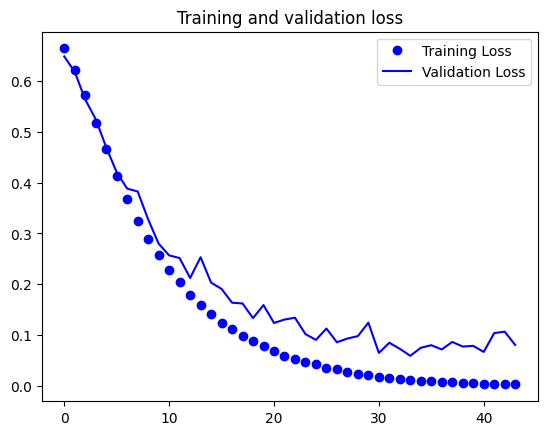

In [15]:
history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    batch_size = 20,
    epochs = 500,
    callbacks = [early_stopping],
    verbose=0
)

# Getting the accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the accuracy
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

# Plotting the loss
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
%pip install xgboost
%pip install lightgbm

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Neural Network
nn_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

y_pred_nn = (nn_model.predict(X_test) > 0.5).astype("int32")
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))


[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


43/43 [==============================] - 0s 2ms/step
Neural Network Accuracy: 0.9698750918442322
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       703
           1       0.94      1.00      0.97       658

    accuracy                           0.97      1361
   macro avg       0.97      0.97      0.97      1361
weighted avg       0.97      0.97      0.97      1361



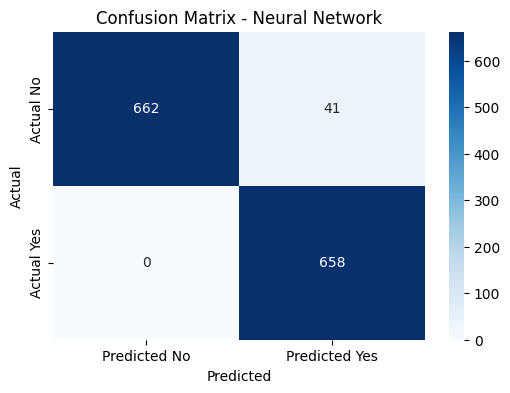

In [17]:
# Plot confusion matrix for the neural network model
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


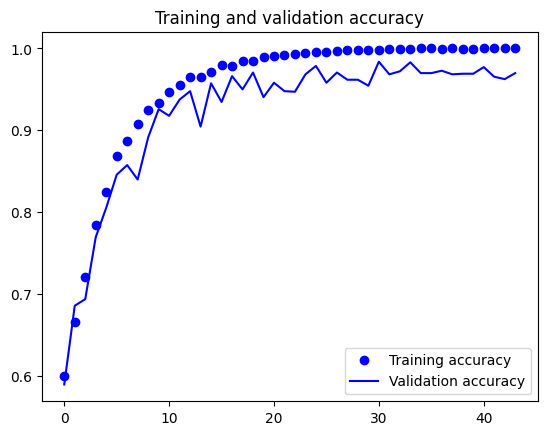

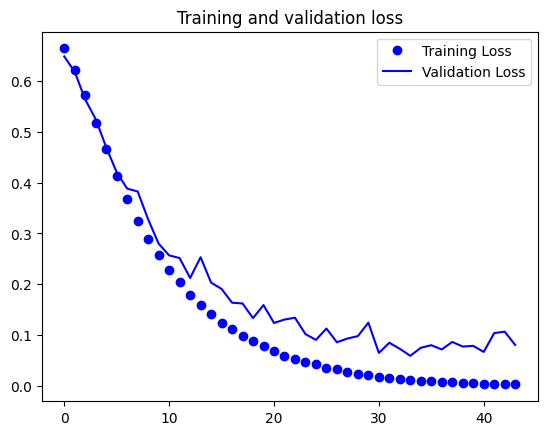

In [18]:
# Plotting the validation accuracy for all models

# Neural Network
plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

# Plotting the loss
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.legend()

In [19]:
import pickle

# Save the neural network model to a pickle file
with open('nn_model.pkl', 'wb') as file:
    pickle.dump(nn_model, file)

In [20]:
import pickle
import numpy as np

# Load the neural network model from the pickle file
with open('nn_model.pkl', 'rb') as file:
    loaded_nn_model = pickle.load(file)

# Function to make predictions on user input data
def predict_asthma(input_data):
    # Assuming input_data is a numpy array with the same number of features as the training data
    input_data_scaled = scaler.transform(input_data)
    prediction = (loaded_nn_model.predict(input_data_scaled) > 0.5).astype("int32")
    return prediction

# Example usage
user_input_data = np.array([[63, 0, 1, 0, 15.848744, 0, 0.894448, 5.488696, 8.701003, 7.388481, 
                             2.855578, 0.974339, 1, 1, 0, 0, 0, 0, 1.369051, 4.941206, 0, 0, 1, 0, 0, 1]])  # Replace with actual user input data
prediction = predict_asthma(user_input_data)
print("Prediction:", prediction)

1/1 [==============================] - 0s 28ms/step
Prediction: [[0]]


c:\Users\kapil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [21]:
from keras.models import save_model

# Save the model
model_path = 'nn_model.h5'
save_model(nn_model, model_path)

# Save metadata if required
metadata = {'model_path': model_path}
with open('metadata.pkl', 'wb') as file:
    pickle.dump(metadata, file)


C:\Users\kapil\AppData\Local\Temp\ipykernel_15676\4226178488.py:5: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(nn_model, model_path)


In [22]:
# 63, 0, 1, 0, 15.848744, 0, 0.894448, 5.488696, 8.701003, 7.388481, 2.855578, 0.974339, 1, 1, 0, 0, 0, 0, 1.369051, 4.941206, 0, 0, 1, 0, 0, 1

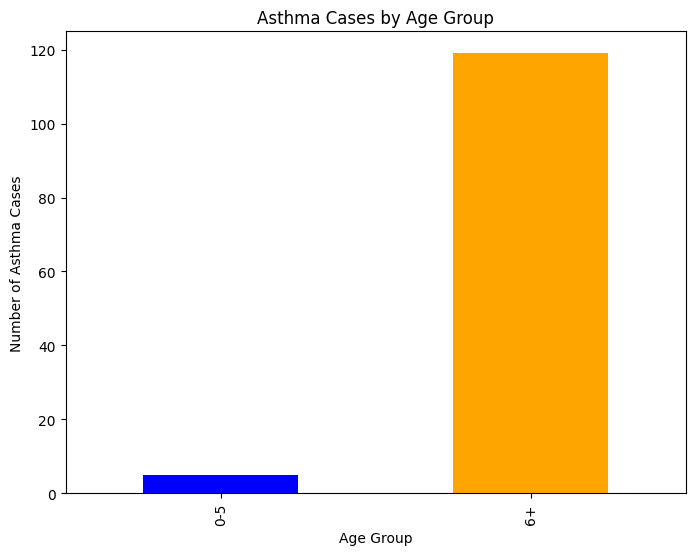

In [40]:
# Create a new column for age groups
df_copy['AgeGroup'] = pd.cut(df_copy['Age'], bins=[0, 5, 100], labels=['0-5', '6+'])

# Filter the data for asthma cases
asthma_cases = df_copy[df_copy['Diagnosis'] == 'Yes']

# Count the number of asthma cases in each age group
age_group_counts = asthma_cases['AgeGroup'].value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(8, 6))
age_group_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Asthma Cases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Asthma Cases')
plt.show()

C:\Users\kapil\AppData\Local\Temp\ipykernel_7820\3678743479.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Prediction", y="PLE", data=df, palette="coolwarm", showfliers=False)


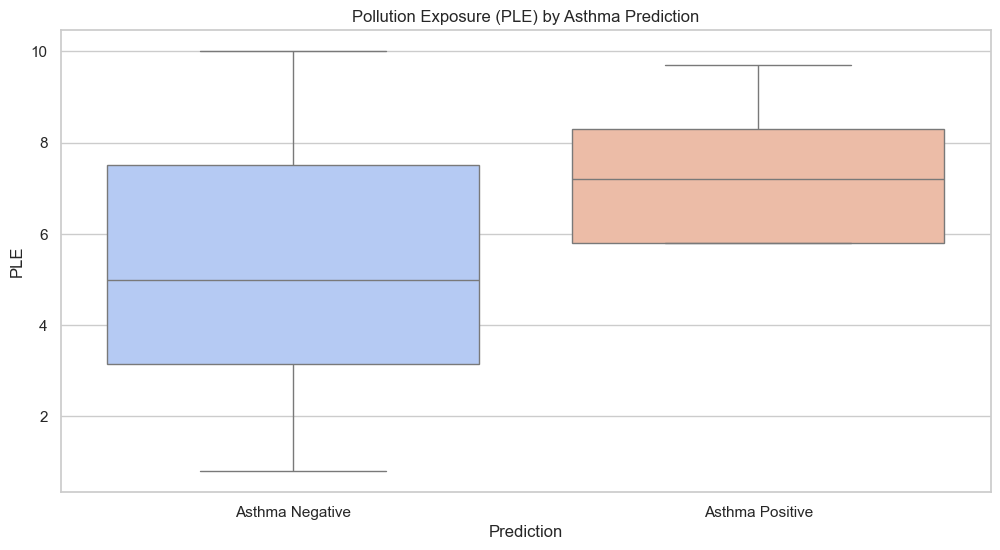

C:\Users\kapil\AppData\Local\Temp\ipykernel_7820\3678743479.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Prediction", y="POE", data=df, palette="coolwarm", showfliers=False)


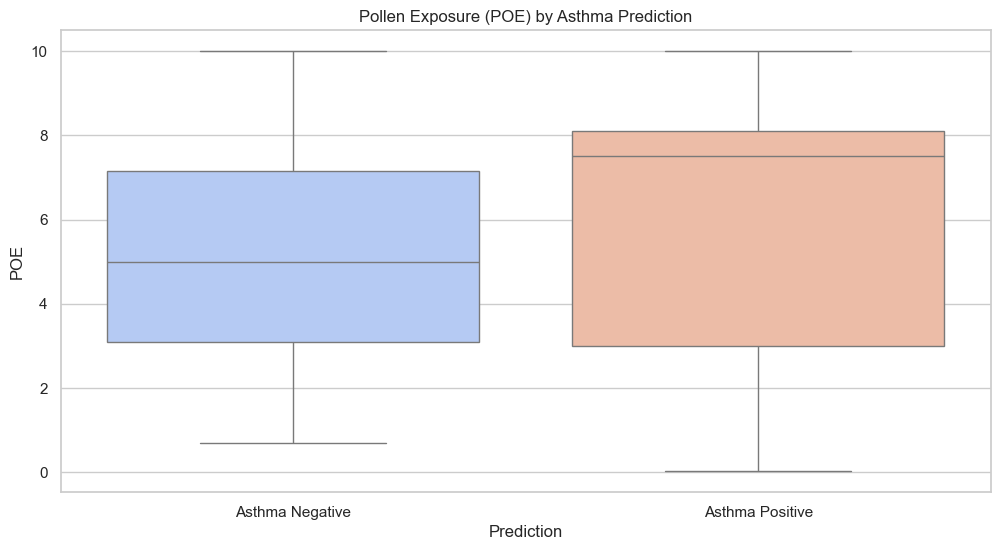

C:\Users\kapil\AppData\Local\Temp\ipykernel_7820\3678743479.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Prediction", y="DE", data=df, palette="coolwarm", showfliers=False)


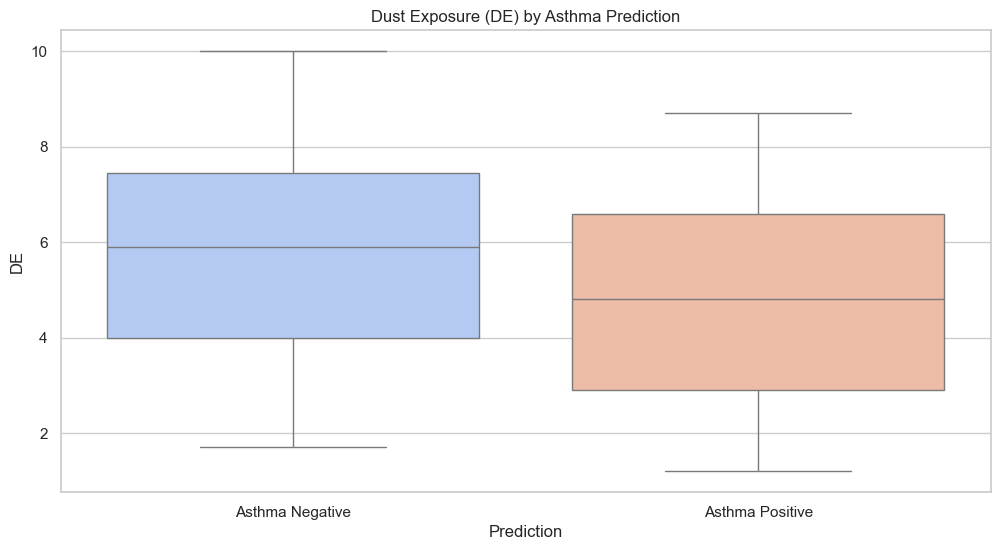

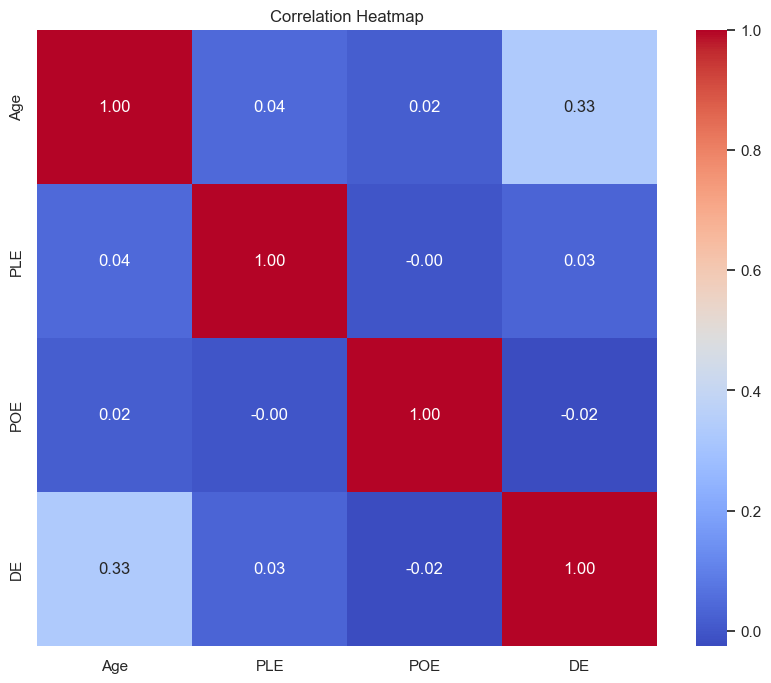

C:\Users\kapil\AppData\Local\Temp\ipykernel_7820\3678743479.py:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Age", y="PLE", hue="Prediction", data=df, ci=None, palette="Set2")


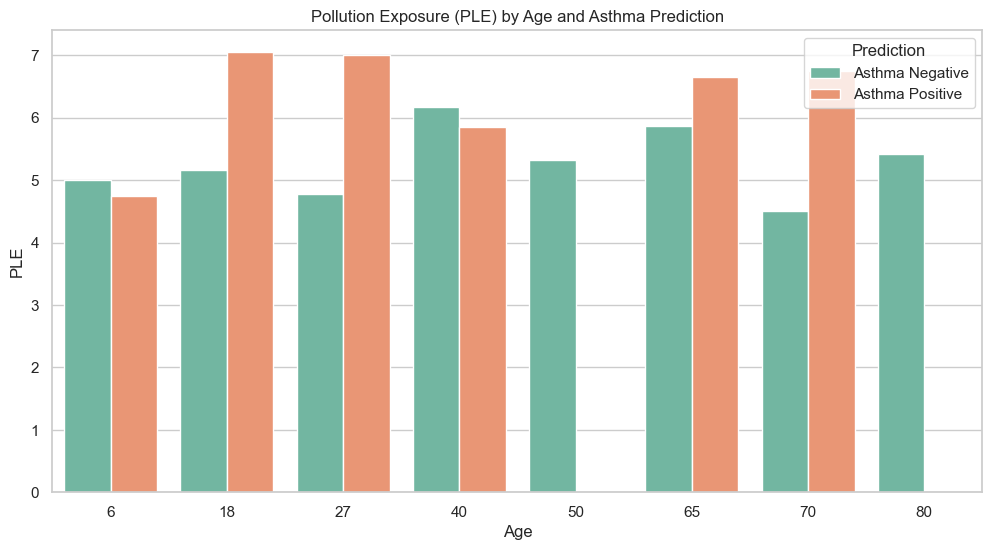

C:\Users\kapil\AppData\Local\Temp\ipykernel_7820\3678743479.py:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Age", y="POE", hue="Prediction", data=df, ci=None, palette="Set2")


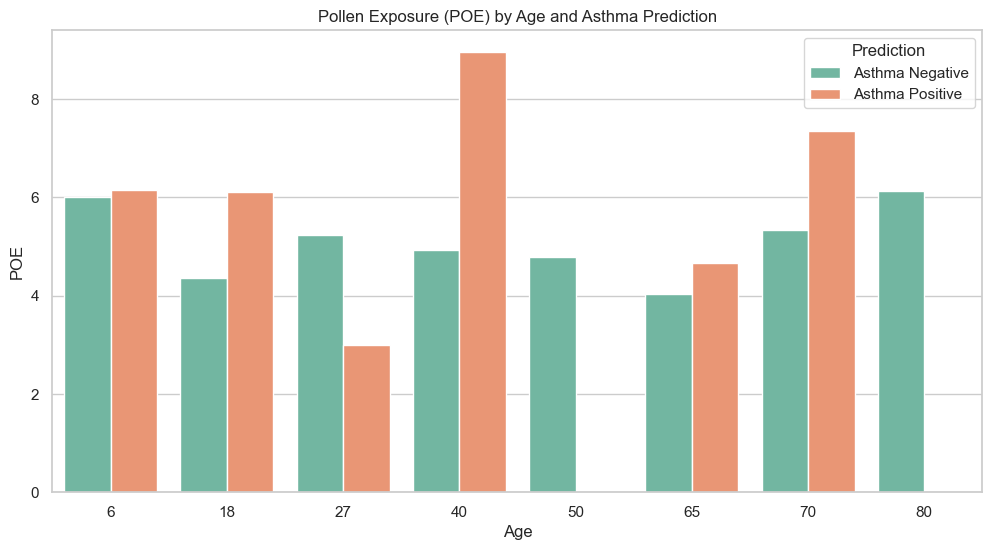

C:\Users\kapil\AppData\Local\Temp\ipykernel_7820\3678743479.py:54: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Age", y="DE", hue="Prediction", data=df, ci=None, palette="Set2")


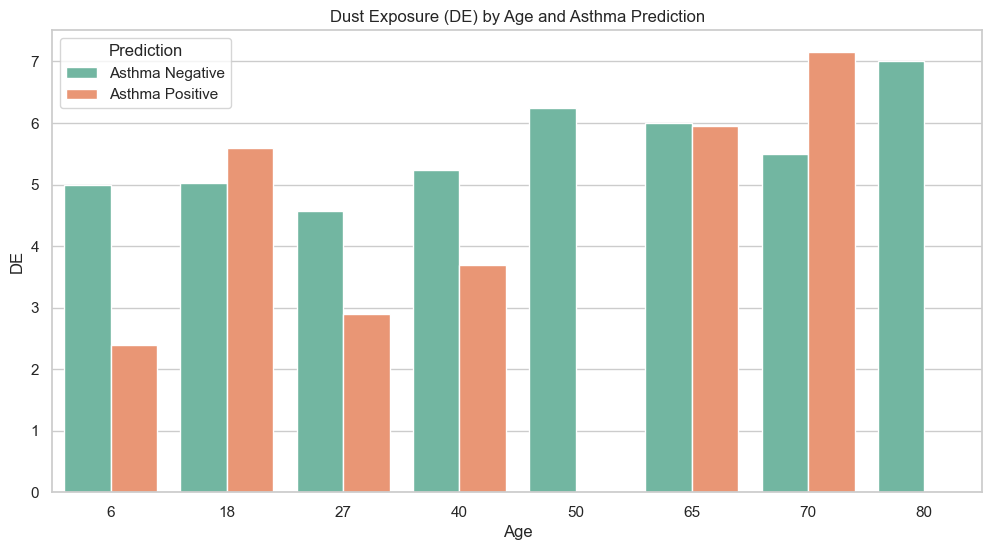

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data preparation
data = {
    "Age": [6, 6, 6, 6, 6, 6, 6, 6, 18, 18, 18, 18, 18, 18, 18, 18, 27, 27, 27, 27, 27, 27, 27, 27, 40, 40, 40, 40, 40, 40, 40, 40, 50, 50, 50, 50, 50, 50, 50, 50, 65, 65, 65, 65, 65, 65, 65, 65, 70, 70, 70, 70, 70, 70, 70, 70, 80, 80, 80, 80, 80, 80, 80, 80],
    "PLE": [4, 8, 10, 9.1, 3, 1, 0.4, 4, 4, 6.4, 3, 1, 8, 6, 7.7, 9, 7, 0.8, 7, 3, 1.7, 8, 7, 6, 2, 5, 8, 5, 7, 9.7, 7, 5, 5.8, 4.2, 3.4, 9.4, 2.8, 8.3, 5.2, 3.5, 2.9, 9.5, 7.2, 8.3, 1.8, 1.7, 9.4, 9.3, 3.6, 3.3, 8.2, 1.9, 5.8, 7.7, 8.1, 1.9, 7, 9, 7, 4, 4.3, 6, 4, 2],
    "POE": [8, 4, 7, 3.7, 2, 10, 8.6, 5, 8, 10, 1, 3, 3.2, 9, 2.2, 2, 10, 0.7, 3, 4, 4, 6, 5, 7, 9.8, 2, 6, 8, 4, 8.1, 3.7, 5.9, 5.5, 1.9, 8.5, 3.6, 3.9, 1.8, 7.3, 5.8, 1.7, 2.3, 0.02104347182, 2.999962562, 4.7, 8.1, 7.5, 7.4, 7.3, 1.9, 4.5, 3.8, 8.1, 6.6, 9.1, 5.4, 10, 9, 3, 2, 7, 4, 7, 7],
    "DE": [4, 7, 8, 3.6, 4, 2, 1.2, 5, 4, 4.8, 7.1, 4.7, 3.4, 7, 6.4, 4, 5, 3, 2.9, 4, 3, 6, 6, 5, 6.1, 3, 3, 7.2, 6, 1.3, 5.2, 7, 2.6, 6.7, 8.4, 9.1, 5.8, 6.1, 1.9, 9.3, 5.9, 8.3, 8.7, 4.7, 8.1, 8.3, 2.1, 1.7, 7.7, 4.3, 1.9, 9.1, 7.7, 6.6, 8.2, 1.8, 8, 8, 10, 7, 4, 4, 7, 8],
    "Prediction": ["Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Positive", "Asthma Negative", "Asthma Negative", "Asthma Positive", "Asthma Negative", "Asthma Negative", "Asthma Positive", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Positive", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Positive", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Positive", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Positive", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Positive", "Asthma Positive", "Asthma Negative", "Asthma Positive", "Asthma Positive", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Positive", "Asthma Positive", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Negative","Asthma Negative","Asthma Negative","Asthma Negative" ]
}

df = pd.DataFrame(data)

# Visualizing distribution of exposure levels by asthma prediction
sns.set_theme(style="whitegrid")

# Plot 1: Pollution, Pollen, and Dust Exposure Distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x="Prediction", y="PLE", data=df, palette="coolwarm", showfliers=False)
plt.title("Pollution Exposure (PLE) by Asthma Prediction")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="Prediction", y="POE", data=df, palette="coolwarm", showfliers=False)
plt.title("Pollen Exposure (POE) by Asthma Prediction")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="Prediction", y="DE", data=df, palette="coolwarm", showfliers=False)
plt.title("Dust Exposure (DE) by Asthma Prediction")
plt.show()

# Plot 2: Heatmap to show correlations between factors and Age
plt.figure(figsize=(10, 8))
correlation = df[["Age", "PLE", "POE", "DE"]].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Plot 3: Exposure Levels by Age Group
plt.figure(figsize=(12, 6))
sns.barplot(x="Age", y="PLE", hue="Prediction", data=df, ci=None, palette="Set2")
plt.title("Pollution Exposure (PLE) by Age and Asthma Prediction")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x="Age", y="POE", hue="Prediction", data=df, ci=None, palette="Set2")
plt.title("Pollen Exposure (POE) by Age and Asthma Prediction")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x="Age", y="DE", hue="Prediction", data=df, ci=None, palette="Set2")
plt.title("Dust Exposure (DE) by Age and Asthma Prediction")
plt.show()

In [5]:
# after introdcuing new feature combination of the three features

C:\Users\kapil\AppData\Local\Temp\ipykernel_7820\2352636606.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Prediction", y="Combined_Exposure", palette="coolwarm")


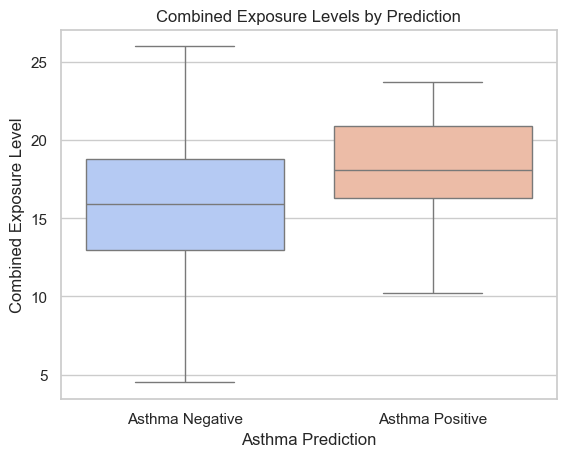

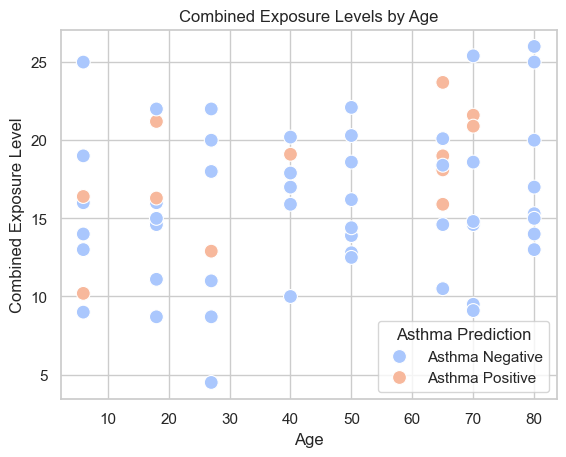

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data preparation
data = {
    "Age": [6, 6, 6, 6, 6, 6, 6, 6, 18, 18, 18, 18, 18, 18, 18, 18, 27, 27, 27, 27, 27, 27, 27, 27, 40, 40, 40, 40, 40, 40, 40, 40, 50, 50, 50, 50, 50, 50, 50, 50, 65, 65, 65, 65, 65, 65, 65, 65, 70, 70, 70, 70, 70, 70, 70, 70, 80, 80, 80, 80, 80, 80, 80, 80],
    "PLE": [4, 8, 10, 9.1, 3, 1, 0.4, 4, 4, 6.4, 3, 1, 8, 6, 7.7, 9, 7, 0.8, 7, 3, 1.7, 8, 7, 6, 2, 5, 8, 5, 7, 9.7, 7, 5, 5.8, 4.2, 3.4, 9.4, 2.8, 8.3, 5.2, 3.5, 2.9, 9.5, 7.2, 8.3, 1.8, 1.7, 9.4, 9.3, 3.6, 3.3, 8.2, 1.9, 5.8, 7.7, 8.1, 1.9, 7, 9, 7, 4, 4.3, 6, 4, 2],
    "POE": [8, 4, 7, 3.7, 2, 10, 8.6, 5, 8, 10, 1, 3, 3.2, 9, 2.2, 2, 10, 0.7, 3, 4, 4, 6, 5, 7, 9.8, 2, 6, 8, 4, 8.1, 3.7, 5.9, 5.5, 1.9, 8.5, 3.6, 3.9, 1.8, 7.3, 5.8, 1.7, 2.3, 7.8, 2.9, 4.7, 8.1, 7.5, 7.4, 7.3, 1.9, 4.5, 3.8, 8.1, 6.6, 9.1, 5.4, 10, 9, 3, 2, 7, 4, 4, 7],
    "DE": [4, 7, 8, 3.6, 4, 2, 1.2, 5, 4, 4.8, 7.1, 4.7, 3.4, 7, 6.4, 4, 5, 3, 2.9, 4, 3, 6, 6, 5, 6.1, 3, 3, 7.2, 6, 1.3, 5.2, 7, 2.6, 6.7, 8.4, 9.1, 5.8, 6.1, 1.9, 9.3, 5.9, 8.3, 8.7, 4.7, 8.1, 8.3, 2.1, 1.7, 7.7, 4.3, 1.9, 9.1, 7.7, 6.6, 8.2, 1.8, 8, 8, 10, 7, 4, 4, 7, 8],
    "Prediction": ["Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Positive", "Asthma Negative", "Asthma Negative", "Asthma Positive", "Asthma Negative", "Asthma Negative", "Asthma Positive", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Positive", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Positive", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Positive", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Positive", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Positive", "Asthma Positive", "Asthma Negative", "Asthma Positive", "Asthma Positive", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Positive", "Asthma Positive", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Negative", "Asthma Negative","Asthma Negative","Asthma Negative","Asthma Negative" ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Add combined exposure levels
df["Combined_Exposure"] = df["PLE"] + df["POE"] + df["DE"]

# Visualize combined exposure by prediction
sns.boxplot(data=df, x="Prediction", y="Combined_Exposure", palette="coolwarm")
plt.title("Combined Exposure Levels by Prediction")
plt.xlabel("Asthma Prediction")
plt.ylabel("Combined Exposure Level")
plt.show()

# Visualize combined exposure levels by age
sns.scatterplot(data=df, x="Age", y="Combined_Exposure", hue="Prediction", palette="coolwarm", s=100)
plt.title("Combined Exposure Levels by Age")
plt.xlabel("Age")
plt.ylabel("Combined Exposure Level")
plt.legend(title="Asthma Prediction")
plt.show()


C:\Users\kapil\AppData\Local\Temp\ipykernel_7820\2220922899.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x="Prediction", y="Combined_Exposure", palette="coolwarm")


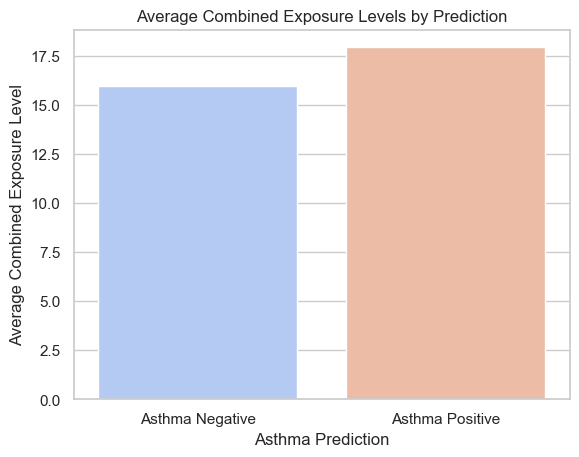

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the DataFrame
df = pd.DataFrame(data)

# Add combined exposure levels
df["Combined_Exposure"] = df["PLE"] + df["POE"] + df["DE"]

# Group data by Prediction and calculate the mean of Combined_Exposure
grouped_data = df.groupby("Prediction")["Combined_Exposure"].mean().reset_index()

# Plot bar graph
sns.barplot(data=grouped_data, x="Prediction", y="Combined_Exposure", palette="coolwarm")
plt.title("Average Combined Exposure Levels by Prediction")
plt.xlabel("Asthma Prediction")
plt.ylabel("Average Combined Exposure Level")
plt.show()


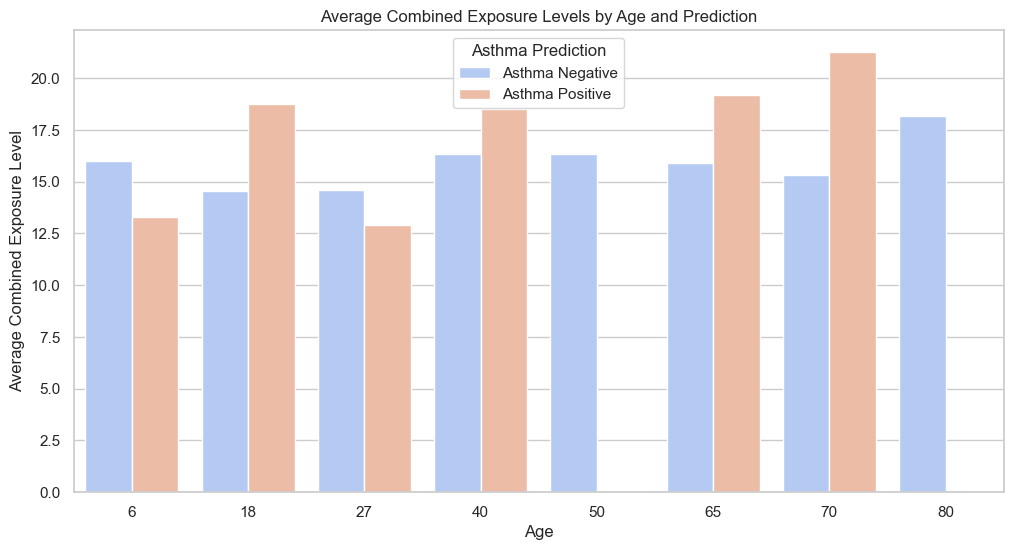

In [9]:
# Group data by Age and Prediction, and calculate the mean of Combined_Exposure
age_grouped_data = df.groupby(["Age", "Prediction"])["Combined_Exposure"].mean().reset_index()

# Plot bar graph
plt.figure(figsize=(12, 6))
sns.barplot(
    data=age_grouped_data,
    x="Age",
    y="Combined_Exposure",
    hue="Prediction",
    palette="coolwarm"
)
plt.title("Average Combined Exposure Levels by Age and Prediction")
plt.xlabel("Age")
plt.ylabel("Average Combined Exposure Level")
plt.legend(title="Asthma Prediction")
plt.show()
